In [476]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Complete_DataFrame = pd.merge(study_results,mouse_metadata, how='left')
#display(Complete_DataFrame.sort_values(by = 'Tumor Volume (mm3)'))
(Complete_DataFrame).head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [477]:
# Checking the number of mice.

Mouse_ID = Complete_DataFrame['Mouse ID'].nunique()
(Mouse_ID)

249

In [478]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = Complete_DataFrame.loc[Complete_DataFrame.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [479]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = Complete_DataFrame.loc[Complete_DataFrame["Mouse ID"]== "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [480]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#clean_dataframe = Complete_DataFrame.drop_duplicates(subset="Mouse ID", keep=False, inplace=True)
#clean_dataframe = ( Complete_DataFrame.drop_duplicates(subset='Mouse ID').sort_values(by = 'Mouse ID'))
clean_dataframe = Complete_DataFrame[Complete_DataFrame["Mouse ID"].isin(duplicate_mouse_ids)== False]
clean_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [481]:
# Checking the number of mice in the clean DataFrame.
Mouse_ID = clean_dataframe['Mouse ID'].nunique()
print(Mouse_ID)

248


In [482]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.




In [483]:
mean_table = clean_dataframe.describe().loc[['mean']]
display(mean_table)


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
mean,19.606383,50.435293,1.025,12.757979,25.660106


In [484]:
mean  = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()


In [485]:
median = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()


In [486]:
variance = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()


In [487]:
StdDev = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()



In [488]:
StdErr = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [489]:
summary_table = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance,"Tumor Volume Std. Dev.":StdDev,"Tumor Volume Std. Err.":StdErr})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [490]:
# Using the aggregation method, produce the same summary statistics in a single line.

summary_table = clean_dataframe.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


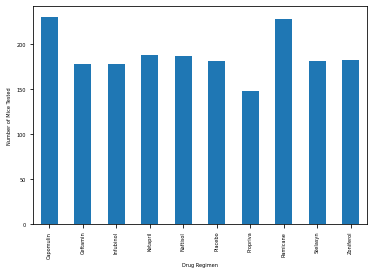

In [491]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Micecount  = clean_dataframe.groupby('Drug Regimen')['Mouse ID'].count()
micecount_df = pd.DataFrame(Micecount)
display(micecount_df)
timepoints_micechart = micecount_df.plot(kind='bar', figsize=(6,4),legend=False)
timepoints_micechart.set_ylabel("Number of Mice Tested")
timepoints_micechart.set_xlabel("Drug Regimen")


plt.show()


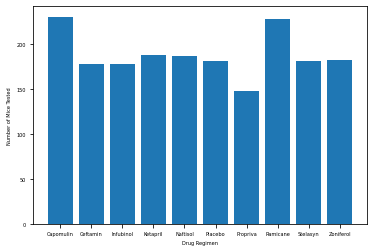

<Figure size 576x432 with 0 Axes>

In [492]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(micecount_df.index.values,micecount_df['Mouse ID'])
plt.xlabel('Drug Regimen')
plt.ylabel ('Number of Mice Tested')
plt.figure(figsize =(8,6))
plt.rcParams['font.size'] = 5
#plt.xticks(xlabel,rotation=45)
plt.show()


In [493]:
micecount_df.index.values

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [494]:
sex_pie_df = pd.DataFrame(clean_dataframe.groupby('Sex').size())
sex_pie_df

,0
Sex,
Female,922
Male,958


In [495]:
sex_pie_df.index.values
#plt.bar(sex_pie_df.index.values,sex_pie_df['Sex'])
#plt.xlabel('Drug Regimen')
#plt.ylabel ('Number of Mice Tested')
#plt.figure(figsize =(8,6))
#plt.rcParams['font.size'] = 5

array(['Female', 'Male'], dtype=object)

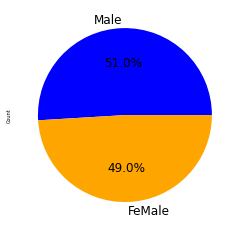

In [496]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = {'Sex': ['Male', 'FeMale'], 'Count': [958, 922]}
df = pd.DataFrame(data)
df.plot.pie(y='Count', labels=df['Sex'], autopct='%1.1f%%', colors=['blue', 'orange'], fontsize=12, legend=False)
plt.show()

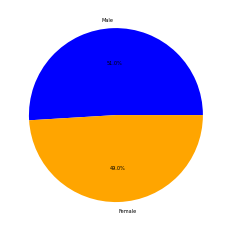

In [497]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = [958, 922]
labels = ['Male', 'Female']
colors = ['blue', 'orange']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

In [498]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_dataframe[clean_dataframe['Drug Regimen'].isin(treatment_regimens)]
grouped_df = filtered_df.groupby("Mouse ID")['Timepoint'].max()
final_tumor_volume_df = pd.merge(grouped_df,filtered_df, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]
print(final_tumor_volume_df)

   Mouse ID  Tumor Volume (mm3) Drug Regimen
0      a203           67.973419    Infubinol
1      a251           65.525743    Infubinol
2      a275           62.999356     Ceftamin
3      a411           38.407618     Ramicane
4      a444           43.047543     Ramicane
..      ...                 ...          ...
95     y769           68.594745     Ceftamin
96     y793           31.896238    Capomulin
97     y865           64.729837     Ceftamin
98     z578           30.638696     Ramicane
99     z581           62.754451    Infubinol

[100 rows x 3 columns]


In [499]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = 0
timepoint = clean_dataframe.groupby(['Drug Regimen', 'Mouse ID']).agg(tumor_vol_data = ('Tumor Volume (mm3)', lambda x: x.iloc[-1]))
#display((timepoint))
#isplay((timepoint.stack()))

for treatment in treatments:
     quartiles = timepoint.stack()[treatment].quantile([.25, .5, .75]).round(2)
     #print(quartiles)
     lowerq  = quartiles[.25].round(2)
     upperq  = quartiles[.75].round(2)
     iqr = round(upperq - lowerq)
     lower_bound = round(lowerq - (1.5 * iqr),2)
     upper_bound = round(upperq + (1.5 * iqr))

     if tumor_vol_data == 0:
        print(f'The IQR of {treatment} is {iqr}')
        print(f'Values below {lower_bound} could be {treatment} outliers')
        print(f'Values below {upper_bound} could be {treatment} outliers')
# locate the rows which contain mice on each drug and get the tumor volumes
# treatment_df = final_tumor_volume_df.loc[df['Drug Regimen'] == treatments]['Tumor Volume (mm3)']
 # add subset
# tumor_vol_data.append(treatment_df)



# Calculate the IQR and quantitatively determine if there are any potential outliers.               
#quartiles = treatment_df.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)

#Determine outliers using upper and lower bound

#outliers = [x for x in treatment_df if x < lower_bound or x > upper_bound]
#print(f"{treatment}'s potential outliers: {outliers}")


The IQR of Capomulin is 8.0
Values below 20.38 could be Capomulin outliers
Values below 52.0 could be Capomulin outliers
The IQR of Ramicane is 9.0
Values below 18.06 could be Ramicane outliers
Values below 54.0 could be Ramicane outliers
The IQR of Infubinol is 11.0
Values below 37.55 could be Infubinol outliers
Values below 82.0 could be Infubinol outliers
The IQR of Ceftamin is 16.0
Values below 24.72 could be Ceftamin outliers
Values below 88.0 could be Ceftamin outliers


tumor_vol_data
Drug Regimen Mouse ID                
Capomulin    b128           38.982878
             b742           38.939633
             f966           30.485985
             g288           37.074024
             g316           40.159220
...                               ...
Zoniferol    q633           70.827796
             s337           62.109651
             w140           47.717952
             w575           68.401286
             x613           48.077646

[248 rows x 1 columns]

Text(0.5, 1.0, 'Tumor Volume by Drug Regimen')

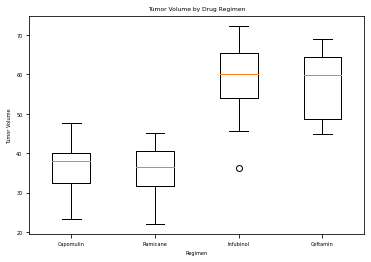

In [500]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
boxplot_list = []
#print("here " + str(treatments))
display(timepoint)
for treatment in treatments:
    #print(timepoint.stack()[treatment])
    boxplot_list.append(list(timepoint.stack()[treatment]))
#display(boxplot_list)
plt.boxplot(boxplot_list, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.xlabel('Regimen')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume by Drug Regimen')
        



No handles with labels found to put in legend.


Tumor volume for Mouse b128: 91.125 cubic millimeters


Text(0, 0.5, 'Tumor Volume(mm3)')

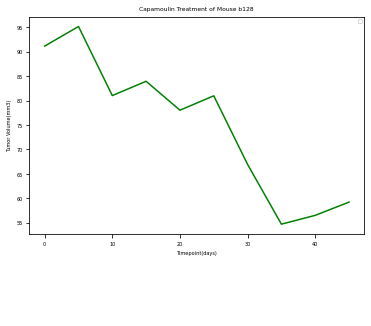

In [506]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomoulin_data = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin"]
#print(capomoulin_data)
Cap_timepoints = capomoulin_data["Timepoint"]
#print(Cap_timepoints)
Timepoint = [Cap_timepoints]

## Choose a mouse ID to calculate tumor volume for

mouse_id = "b128"

# Filter the data for mice treated with Capomulin and the chosen mouse ID

#capomulin_data =clean_dataframe.loc[(clean_dataframe["Drug Regimen"] == "Capomulin") & (clean_dataframe["Mouse ID"] == mouse_id)]

# Filter the data for mice treated with Capomulin and the "b128" mouse ID
capomulin_b128_data = clean_dataframe.loc[(clean_dataframe["Drug Regimen"] == "Capomulin") & (clean_dataframe["Mouse ID"] == "b128")]

# Extract the timepoints for the "b128" mouse ID treated with Capomulin
timepoints = capomulin_b128_data["Timepoint"]

# Calculate the tumor volume for the chosen mouse ID
length = capomulin_data["Tumor Volume (mm3)"]
width = capomulin_data["Tumor Volume (mm3)"]
height = capomulin_data["Tumor Volume (mm3)"]
tumor_volume = (length * width * height) / 1000

# Print the tumor volume for the chosen mouse ID
print(f"Tumor volume for Mouse {mouse_id}: {tumor_volume.iloc[0]} cubic millimeters")

plt.plot(timepoints, tumor_volume, color="green")
plt.legend(loc="best")

plt.title("Capamoulin Treatment of Mouse b128")
plt.annotate(line, (20,36), fontsize = 12)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3)")



Text(0, 0.5, 'Average Tumor Volume (mm3)')

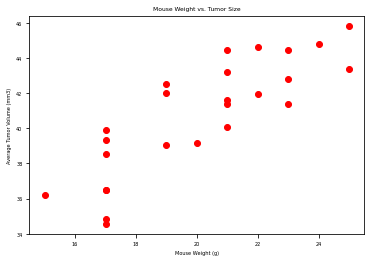

In [502]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_capo_volume = capomoulin_data.groupby('Mouse ID').mean()
plt.scatter(avg_capo_volume['Weight (g)'],avg_capo_volume['Tumor Volume (mm3)'],color = 'R')
plt.title('Mouse Weight vs. Tumor Size')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

The correlation between mouse weight and average tumor size is 0.84


Text(0, 0.5, 'Average Tumor Volume (mn3)')

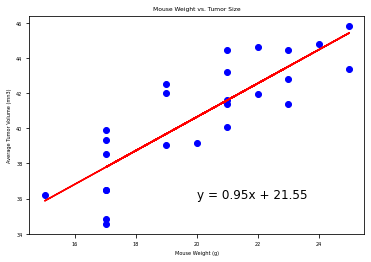

In [503]:
# Calculate the correlation coefficient and linear regression model 
import scipy.stats as st
Correlation = st.pearsonr(avg_capo_volume['Weight (g)'], avg_capo_volume['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and average tumor size is {round(Correlation[0], 2)}')

# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_capo_volume['Weight (g)'], avg_capo_volume['Tumor Volume (mm3)'])
regress = avg_capo_volume['Weight (g)'] * slope + intercept
line = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.scatter(avg_capo_volume['Weight (g)'], avg_capo_volume['Tumor Volume (mm3)'], color ='b')
plt.plot(avg_capo_volume['Weight (g)'], regress, color = 'red')
plt.annotate(line, (20,36), fontsize = 12)
plt.title('Mouse Weight vs. Tumor Size')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mn3)')